In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
import time

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
train_labels = pd.read_csv("/content/drive/MyDrive/DataDcience/train_labels_undersampled.csv")
train_values = pd.read_csv("/content/drive/MyDrive/DataDcience/train_values_undersampled.csv")

In [8]:
train_labels.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_labels.head()

,damage_grade
0,1
1,1
2,1
3,1
4,1


In [9]:
train_values.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,20,323,12236,2,0.000000,0.500000,0.571429,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,26,886,994,1,0.000000,0.857143,0.285714,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13,305,5956,2,0.000000,0.571429,0.857143,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,7,157,5265,1,0.083333,0.714286,0.142857,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,26,762,742,1,0.000000,1.000000,0.142857,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels, test_size = 0.2, random_state = 42)

In [11]:
X_test.shape

(15075, 60)

In [12]:
X_train.shape

(60297, 60)

In [13]:
dt = KNeighborsClassifier(n_neighbors=10, metric="euclidean", n_jobs=4)

In [14]:
start_time = time.time()
model = dt.fit(X_train, y_train)
dt_time_fit = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [15]:
start_time = time.time()
predictions_test = model.predict(X_test)
dt_time_pred = time.time() - start_time

In [16]:
print(predictions_test)

[2 1 3 ... 1 2 2]


In [17]:
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Precision: ", metrics.precision_score(y_test,predictions_test, average='micro'))
print("Recall: ", metrics.recall_score(y_test,predictions_test,average='micro'))
print("Accuracy: ", metrics.accuracy_score(y_test,predictions_test))
print("F1_score: ", metrics.f1_score(y_test,predictions_test, average='micro'))

Fit Time: 0.07659649848937988 seconds
Prediction Time: 18.02652859687805 seconds
Precision:  0.6396019900497513
Recall:  0.6396019900497513
Accuracy:  0.6396019900497513
F1_score:  0.6396019900497513


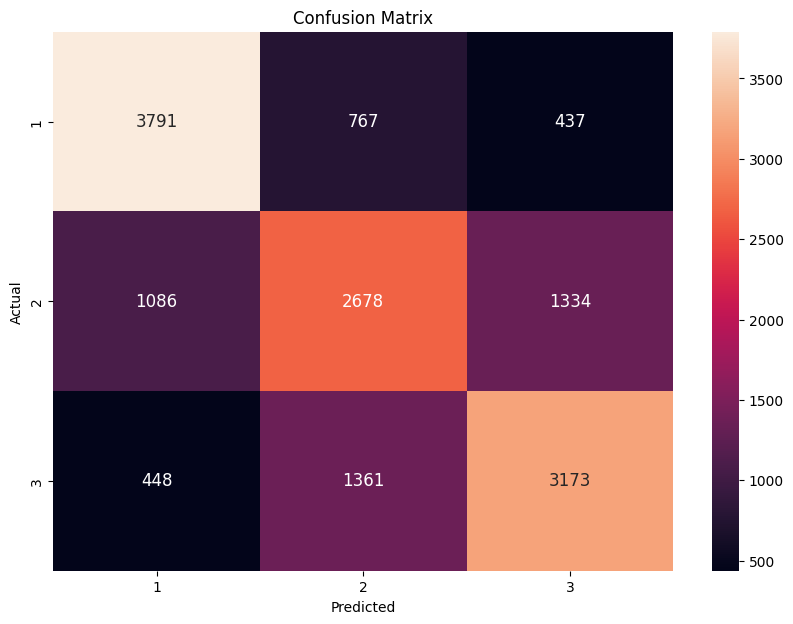

In [18]:
data = confusion_matrix(y_test,predictions_test)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()